Methods to generate plots for static accuracy experiments

The following block of code creates an object g that reads four sets of CSV files (without reapplication), constructs a pandas DataFrame, and fits a second-order polynomial model using 80% of the data for training and 20% for testing (as defined in the train_test class method). This data split is performed randomly. After fitting the model, the code plots the model's accuracy over 100 iterations.

Subsequently, the fitted model is used to assess the accuracy of two additional sets of tests, where reapplication occurred before each block of tests. 

In [1]:
from analysis import bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os

### 9 / 17 - 9/19 datasets

Start by plotting curves / accuracy for all datasets individually 

['/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_17_24/Bending_data_9_17_24_v2.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_17_24/Bending_data_9_17_24_v3.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_17_24/Bending_data_9_17_24_v4.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_17_24/Bending_data_9_17_24.csv']
ADC normalized (R-R0) / R0. ADC min:  21.0
['/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_19_24_v1/Bending_data_9_19_24_v3.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_19_24_v1/Bending_data_9_19_24_v2.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_19_24_v1/Bending_data_9_19_24_v1.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_19_24_v1/Bending_data_9_19_24_v4.csv']
ADC normalized (R-R0) / R0. ADC min:  21.0
['/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_19_24_v2/Bending_data_9_19_24_v8.csv', '/Users/preeyakha

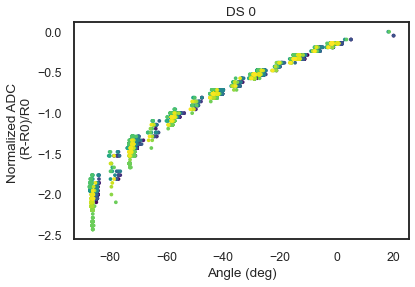

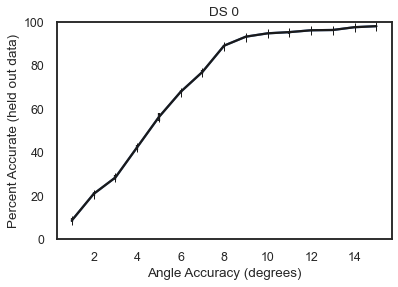

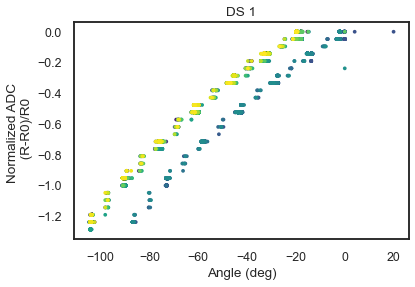

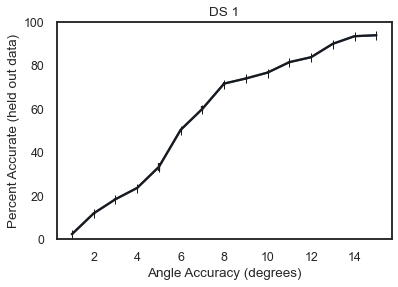

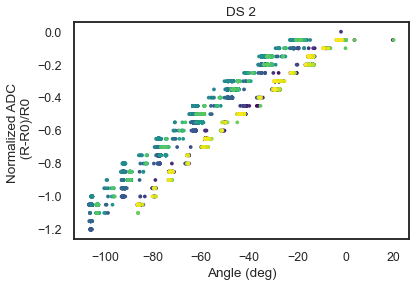

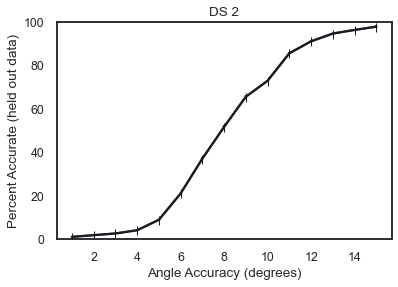

In [2]:
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/9_17_24/*.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/9_19_24_v1/*.csv")
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/9_19_24_v2/*.csv")
DS_all = [DS1_datafiles, DS2_datafiles, DS3_datafiles]

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.plot_data(scatter=True, title='DS %d'%i_d)

    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

Now fit model on dataset 1 and test on dataset 2 and 3 etc. 

['/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_17_24/Bending_data_9_17_24_v2.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_17_24/Bending_data_9_17_24_v3.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_17_24/Bending_data_9_17_24_v4.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_17_24/Bending_data_9_17_24.csv']
ADC normalized (R-R0) / R0. ADC min:  21.0
['/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_19_24_v1/Bending_data_9_19_24_v3.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_19_24_v1/Bending_data_9_19_24_v2.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_19_24_v1/Bending_data_9_19_24_v1.csv', '/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_19_24_v1/Bending_data_9_19_24_v4.csv']
ADC normalized (R-R0) / R0. ADC min:  21.0
['/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/9_19_24_v2/Bending_data_9_19_24_v8.csv', '/Users/preeyakha

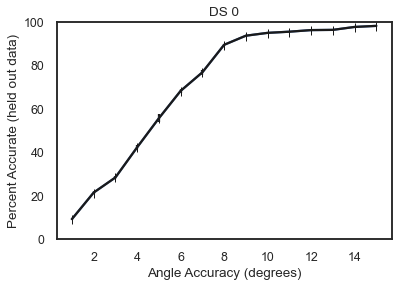

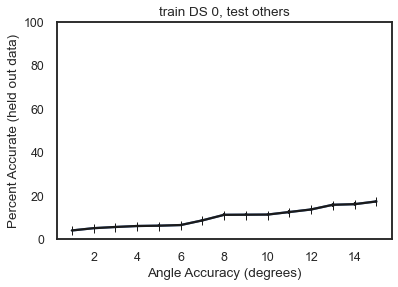

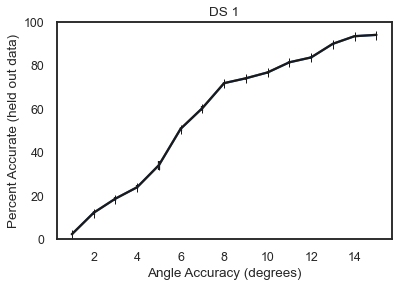

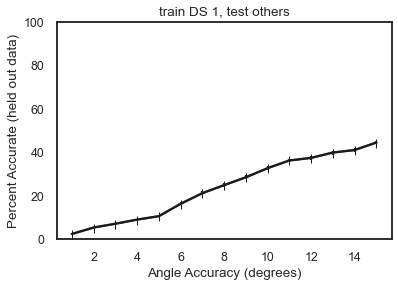

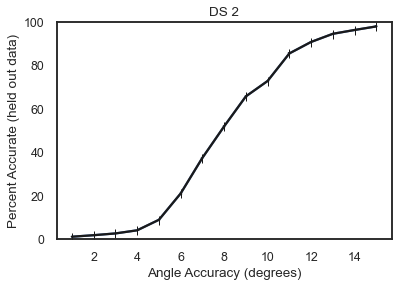

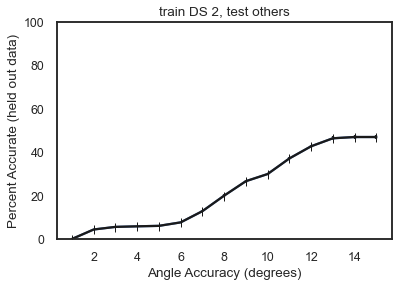

In [3]:
# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

    ## Now test data on other datasets
    ixs = [0, 1, 2]
    ixs.remove(i_d)
    
    ## Iterate over other datasets 
    g2 = bender_class()
    g2.load_data(DS_all[ixs[0]])
    g2.normalize_adc_over_R0()
    g3 = bender_class()
    g3.load_data(DS_all[ixs[1]])
    g3.normalize_adc_over_R0()

    df_combined = pd.concat([g2.data, g3.data], ignore_index=True)

    acc = []; 
    for i in range(10): 
        _, dftest = train_test_split(df_combined, test_size=0.1, shuffle=True)
        acc.append(g.predict_new_data(dftest))
    acc = np.vstack((acc))
    
    g.plot_accuracy(title='train DS %d, test others'%i_d, accuracy=acc)



### 10 / 14 dataset

In [6]:
path_to_repository

'/Users/preeyakhanna/code_khannalab/Strain-Sensor-/'

['/Users/preeyakhanna/code_khannalab/Strain-Sensor-/CSV Data/10_14_2024/v2/single data set/Bending_data_10_14_2024_v11.csv']
ADC normalized (R-R0) / R0. ADC min:  -1154520.0


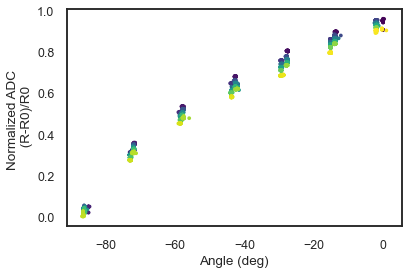

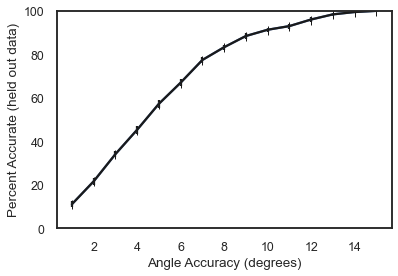

In [8]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize

g = bender_class()
path = os.path.join(path_to_repository, 'CSV Data/10_14_2024/v2/single data set/*.csv')
g.load_data(path)
g.normalize_adc_over_R0()
g.plot_data(scatter=True)

# Perform quadratic fit where 80% train/ 20% test, and determine accuracy to +/- 10 deg
g.train_model_test_accuracy(perc_train=0.8, niter = 10)
g.plot_accuracy()